In [ ]:
# if using Google Colab; Do not run this cell
from google.colab import drive
drive.mount('/content/drive')

%%bash
%cd /content/drive/MyDrive/MDI_project/FINAL

Mounted at /content/drive


In [19]:
# renaming the rgb video subfolders
import os

root_dir = './raw_data/rgb_videos/rgb_public_vehicles'

for furniture_type in os.listdir(root_dir):
    furniture_path = os.path.join(root_dir, furniture_type)
    if not os.path.isdir(furniture_path):
        continue

    subfolders = [f for f in os.listdir(furniture_path) if os.path.isdir(os.path.join(furniture_path, f))]
    subfolders.sort()  # optional: to make ordering consistent

    for i, folder in enumerate(subfolders, 1):
        old_path = os.path.join(furniture_path, folder)
        new_name = f"{i:02d}"
        new_path = os.path.join(furniture_path, new_name)

        # Avoid overwriting if new folder name already exists
        if old_path != new_path:
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")


Renamed: ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/1-23923-87995 -> ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/01
Renamed: ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/1-45140-66793 -> ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/02
Renamed: ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/1-63789-75287 -> ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/03
Renamed: ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/1-97963-48948 -> ./raw_data/rgb_videos/rgb_public_vehicles/railcar_part_of_a_train/04
Renamed: ./raw_data/rgb_videos/rgb_public_vehicles/tractor_farm_equipment/1-12092-54802 -> ./raw_data/rgb_videos/rgb_public_vehicles/tractor_farm_equipment/01
Renamed: ./raw_data/rgb_videos/rgb_public_vehicles/tractor_farm_equipment/1-12256-53153 -> ./raw_data/rgb_videos/rgb_public_vehicles/tractor_farm_equipment/02
Renamed: ./raw_data/rgb_videos/rgb_pub

In [20]:
# renaming the masked video subfolders
import os

root_dir = './raw_data/masked_videos/masked_public_vehicles'

for furniture_type in os.listdir(root_dir):
    furniture_path = os.path.join(root_dir, furniture_type)
    if not os.path.isdir(furniture_path):
        continue

    subfolders = [f for f in os.listdir(furniture_path) if os.path.isdir(os.path.join(furniture_path, f))]
    subfolders.sort()  # optional: to make ordering consistent

    for i, folder in enumerate(subfolders, 1):
        old_path = os.path.join(furniture_path, folder)
        new_name = f"{i:02d}"
        new_path = os.path.join(furniture_path, new_name)

        # Avoid overwriting if new folder name already exists
        if old_path != new_path:
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")


Renamed: ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/1-23923-87995 -> ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/01
Renamed: ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/1-45140-66793 -> ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/02
Renamed: ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/1-63789-75287 -> ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/03
Renamed: ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/1-97963-48948 -> ./raw_data/masked_videos/masked_public_vehicles/railcar_part_of_a_train/04
Renamed: ./raw_data/masked_videos/masked_public_vehicles/tractor_farm_equipment/1-12092-54802 -> ./raw_data/masked_videos/masked_public_vehicles/tractor_farm_equipment/01
Renamed: ./raw_data/masked_videos/masked_public_vehicles/tractor_farm_equipment/1-12256-53153 -> ./raw_data/masked_videos/masked_public_v

In [5]:
# check the duration of each data
import cv2

def get_duration_opencv(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    duration = frame_count / fps if fps > 0 else 0
    cap.release()
    return duration

rgb_path = "./raw_data/rgb_videos/rgb_street_building_and_construction/crucifix/01/rgb_video.mp4"
print(f"RGB Video: {get_duration_opencv(rgb_path)} seconds")
mask_path = "./raw_data/masked_videos/masked_street_building_and_construction/crucifix/01/mask_video.mkv"
print(f"Masked Video: {get_duration_opencv(mask_path)} seconds")

RGB Video: 49.882668454575935 seconds
Masked Video: 49.882668454575935 seconds


In [21]:
# extract 10 rgb frames for each furniture
import os
import cv2

input_root = './raw_data/rgb_videos/rgb_public_vehicles'
output_root = './data/rgb_public_vehicles_frames'

for category in os.listdir(input_root):
    category_path = os.path.join(input_root, category)
    if not os.path.isdir(category_path):
        continue

    for video_folder in os.listdir(category_path):
        folder_path = os.path.join(category_path, video_folder)
        if not os.path.isdir(folder_path):
            continue

        video_path = os.path.join(folder_path, 'rgb_video.mp4')
        if not os.path.isfile(video_path):
            continue

        # Create output directory
        output_folder = os.path.join(output_root, category, video_folder)
        os.makedirs(output_folder, exist_ok=True)

        # Open the video
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        interval = max(total_frames // 10, 1)

        for i in range(10):
            frame_idx = i * interval
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            if ret:
                out_path = os.path.join(output_folder, f"frame_{i+1:02d}.jpg")
                cv2.imwrite(out_path, frame)
                print(f"Saved: {out_path}")
            else:
                print(f"Failed to read frame {frame_idx} in {video_path}")

        cap.release()


Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_01.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_02.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_03.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_04.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_05.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_06.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_07.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_08.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_09.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/03/frame_10.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/04/frame_01.jpg
Saved: ./data/rgb_public_vehicles_frames/railcar_part_of_a_train/04/frame_02.jpg
Saved: ./data/rgb_public_veh

In [22]:
import os
import cv2

input_root = './raw_data/masked_videos/masked_public_vehicles'
output_root = './data/masked_public_vehicles_frames'

for category in os.listdir(input_root):
    category_path = os.path.join(input_root, category)
    if not os.path.isdir(category_path):
        continue

    for video_folder in os.listdir(category_path):
        folder_path = os.path.join(category_path, video_folder)
        if not os.path.isdir(folder_path):
            continue

        video_path = os.path.join(folder_path, 'mask_video.mkv')
        if not os.path.isfile(video_path):
            continue

        # Create output directory
        output_folder = os.path.join(output_root, category, video_folder)
        os.makedirs(output_folder, exist_ok=True)

        # Open the video
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        interval = max(total_frames // 10, 1)

        for i in range(10):
            frame_idx = i * interval
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            if ret:
                out_path = os.path.join(output_folder, f"frame_{i+1:02d}.jpg")
                cv2.imwrite(out_path, frame)
                print(f"Saved: {out_path}")
            else:
                print(f"Failed to read frame {frame_idx} in {video_path}")

        cap.release()


Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_01.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_02.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_03.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_04.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_05.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_06.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_07.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_08.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_09.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/03/frame_10.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/04/frame_01.jpg
Saved: ./data/masked_public_vehicles_frames/railcar_part_of_a_train/04/frame

## Data Validation (Manual 1: OpenCV)

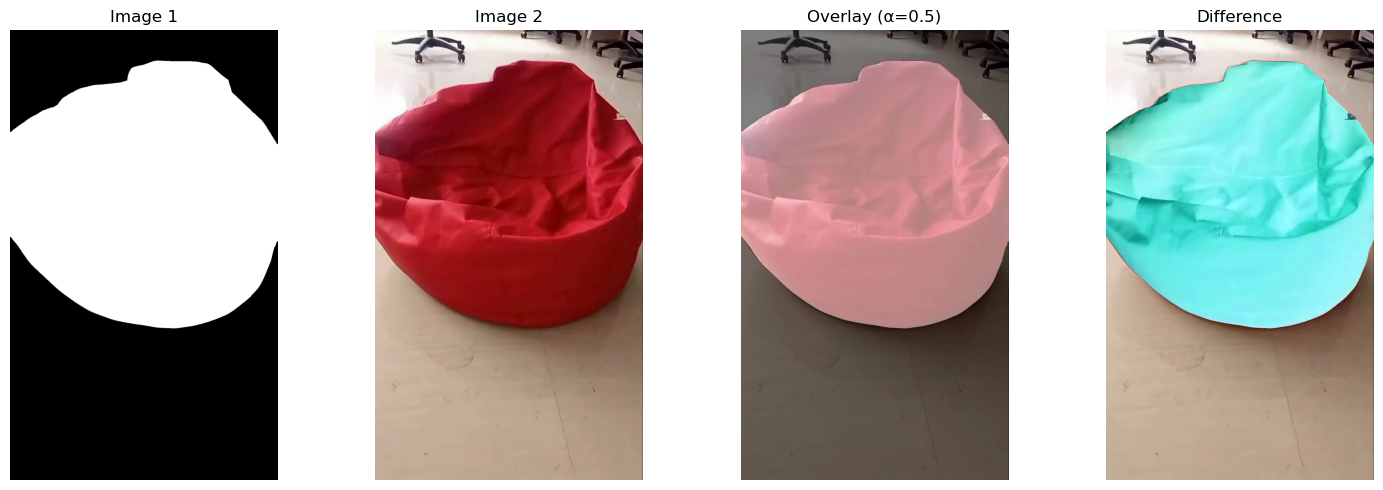

In [23]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def overlay_images_with_transparency(image1_path, image2_path, alpha=0.5):
    """
    Overlay two images with transparency to check alignment
    
    Args:
        image1_path: Path to first image
        image2_path: Path to second image
        alpha: Transparency factor (0-1, where 0.5 means 50% transparent)
    """
    
    # Read images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)
    
    # Convert BGR to RGB for display
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    # Resize images to same dimensions if needed
    h1, w1 = img1_rgb.shape[:2]
    h2, w2 = img2_rgb.shape[:2]
    
    # Use smaller dimensions to avoid cropping
    min_h, min_w = min(h1, h2), min(w1, w2)
    img1_resized = cv2.resize(img1_rgb, (min_w, min_h))
    img2_resized = cv2.resize(img2_rgb, (min_w, min_h))
    
    # Create overlay using weighted addition
    overlay = cv2.addWeighted(img1_resized, alpha, img2_resized, 1-alpha, 0)
    
    # Display results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(img1_resized)
    plt.title('Image 1')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(img2_resized)
    plt.title('Image 2')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(overlay)
    plt.title(f'Overlay (α={alpha})')
    plt.axis('off')
    
    # Create difference image to highlight mismatches
    diff = cv2.absdiff(img1_resized, img2_resized)
    plt.subplot(1, 4, 4)
    plt.imshow(diff)
    plt.title('Difference')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return overlay, diff


def check_image_similarity(image1_path, image2_path):
    """
    Calculate similarity metrics between two images
    """
    
    # Read images in grayscale
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to same dimensions
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    min_h, min_w = min(h1, h2), min(w1, w2)
    
    img1_resized = cv2.resize(img1, (min_w, min_h))
    img2_resized = cv2.resize(img2, (min_w, min_h))
    
    # Calculate metrics
    mse = np.mean((img1_resized - img2_resized) ** 2)
    
    # Structural Similarity Index
    from skimage.metrics import structural_similarity as ssim
    ssim_score = ssim(img1_resized, img2_resized)
    
    # Normalized Cross Correlation
    ncc = cv2.matchTemplate(img1_resized, img2_resized, cv2.TM_CCORR_NORMED)[0][0]
    
    print(f"Image Similarity Metrics:")
    print(f"Mean Squared Error: {mse:.2f} (lower is better)")
    print(f"Structural Similarity: {ssim_score:.4f} (1.0 is perfect match)")
    print(f"Normalized Cross Correlation: {ncc:.4f} (1.0 is perfect match)")
    
    return mse, ssim_score, ncc

if __name__ == "__main__":
    # Replace with your image paths
    image1_path = "frame_01.jpg"
    image2_path = "frame_01_copy.jpg"
    
    try:
        overlay1, diff = overlay_images_with_transparency(image1_path, image2_path, alpha=0.5)
            
    except FileNotFoundError:
        print("Please update the image paths to point to your actual image files")
        print("Example:")
        print('overlay_images_with_transparency("path/to/image1.jpg", "path/to/image2.jpg")')

## Manual 2: PIL

Method 2: Using PIL


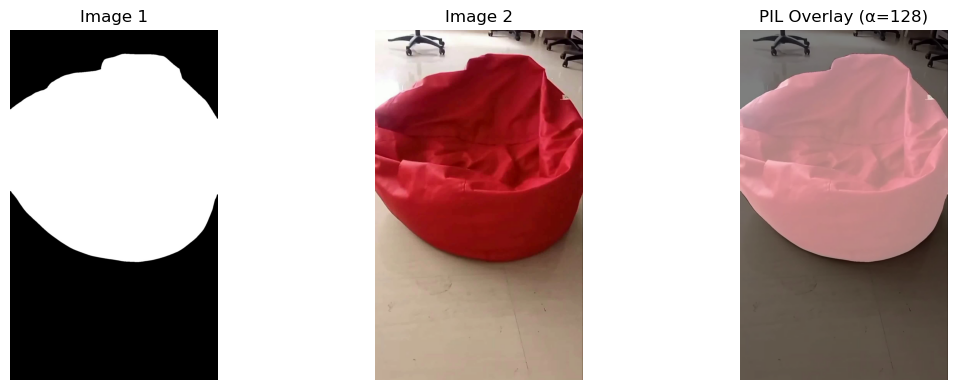

In [24]:
def overlay_images_pil(image1_path, image2_path, alpha=128):
    """
    Alternative method using PIL with more control
    
    Args:
        image1_path: Path to first image
        image2_path: Path to second image
        alpha: Alpha value (0-255, where 128 is 50% transparent)
    """
    
    print("Method 2: Using PIL")
    
    # Open images
    img1 = Image.open(image1_path).convert('RGBA')
    img2 = Image.open(image2_path).convert('RGBA')
    
    # Resize to same dimensions
    size = (min(img1.width, img2.width), min(img1.height, img2.height))
    img1 = img1.resize(size, Image.Resampling.LANCZOS)
    img2 = img2.resize(size, Image.Resampling.LANCZOS)
    
    # Make second image transparent
    img2_transparent = img2.copy()
    img2_transparent.putalpha(alpha)
    
    # Create overlay
    overlay = Image.alpha_composite(img1, img2_transparent)
    
    # Display
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img1)
    plt.title('Image 1')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img2)
    plt.title('Image 2')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title(f'PIL Overlay (α={alpha})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return overlay

if __name__ == "__main__":
    # Replace with your image paths
    image1_path = "frame_01.jpg"
    image2_path = "frame_01_copy.jpg"
    
    try:
        overlay2 = overlay_images_pil(image1_path, image2_path, alpha=128)
            
    except FileNotFoundError:
        print("Please update the image paths to point to your actual image files")
        print("Example:")
        print('overlay_images_with_transparency("path/to/image1.jpg", "path/to/image2.jpg")')

## Automated

binarized the image (computing 0 and 1)
background: 1, masked part: 0


In [4]:
def check_image_similarity(image1_path, image2_path):
    """
    Calculate similarity metrics between two images
    """
    
    # Read images in grayscale
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to same dimensions
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    min_h, min_w = min(h1, h2), min(w1, w2)
    
    img1_resized = cv2.resize(img1, (min_w, min_h))
    img2_resized = cv2.resize(img2, (min_w, min_h))
    
    # Calculate metrics
    mse = np.mean((img1_resized - img2_resized) ** 2)
    
    # Structural Similarity Index
    from skimage.metrics import structural_similarity as ssim
    ssim_score = ssim(img1_resized, img2_resized)
    
    # Normalized Cross Correlation
    ncc = cv2.matchTemplate(img1_resized, img2_resized, cv2.TM_CCORR_NORMED)[0][0]
    
    print(f"Image Similarity Metrics:")
    print(f"Mean Squared Error: {mse:.2f} (lower is better)")
    print(f"Structural Similarity: {ssim_score:.4f} (1.0 is perfect match)")
    print(f"Normalized Cross Correlation: {ncc:.4f} (1.0 is perfect match)")
    
    return mse, ssim_score, ncc

if __name__ == "__main__":
    # Replace with your image paths
    image1_path = "frame_03.jpg"
    image2_path = "frame_03_masked.jpg"
    
    try:
        similarity_metrics = check_image_similarity(image1_path, image2_path)
            
    except FileNotFoundError:
        print("Please update the image paths to point to your actual image files")
        print("Example:")
        print('overlay_images_with_transparency("path/to/image1.jpg", "path/to/image2.jpg")')

Image Similarity Metrics:
Mean Squared Error: 100.55 (lower is better)
Structural Similarity: 0.1257 (1.0 is perfect match)
Normalized Cross Correlation: 0.3615 (1.0 is perfect match)
